In [45]:
import pandas as pd
import numpy as np

In [46]:
dataFrame=pd.read_csv("heart.xls")

In [47]:
""""
Sex:

0: Female =>Kadın
1: Male => Erkek

Chest Pain Type: => Göğüs Ağrı tipi

0: Typical Angina
1: Atypical Angina
2: Non-Anginal Pain
3: Asymptomatic

Resting Blood Pressure: Person's resting blood pressure. => dinlendirken Tansiyonu
Cholesterol: Serum Cholesterol in mg/dl =>Kolestrol
Fasting Blood Sugar: Kan şekeri

0:Less Than 120mg/ml
1: Greater Than 120mg/ml

Resting Electrocardiographic Measurement(ölçümü):

0: Normal
1: ST-T Wave Abnormality
2: Left Ventricular Hypertrophy

Max Heart Rate Achieved: Maximum Heart Rate Achieved
Exercise Induced Angina:

1: Yes
0: No

ST Depression: ST depression induced by exercise relative to rest.
Slope: Slope of the peak exercise ST segment:

0: Upsloping
1: Flat
2: Downsloping

Thalassemia: A blood disorder called 'Thalassemia':

0: Normal
1: Fixed Defect
2: Reversable Defect

Number of Major Vessels: Number of major vessels colored by fluoroscopy."""
dataFrame.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [48]:
import seaborn as sbn
import matplotlib.pyplot as plt

In [49]:
 dataFrame.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [50]:
categorical_val = []
continuous_val = []
for column in dataFrame.columns:
    print('==============================')
    print(f"{column} : {dataFrame[column].unique()}")
    if len(dataFrame[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

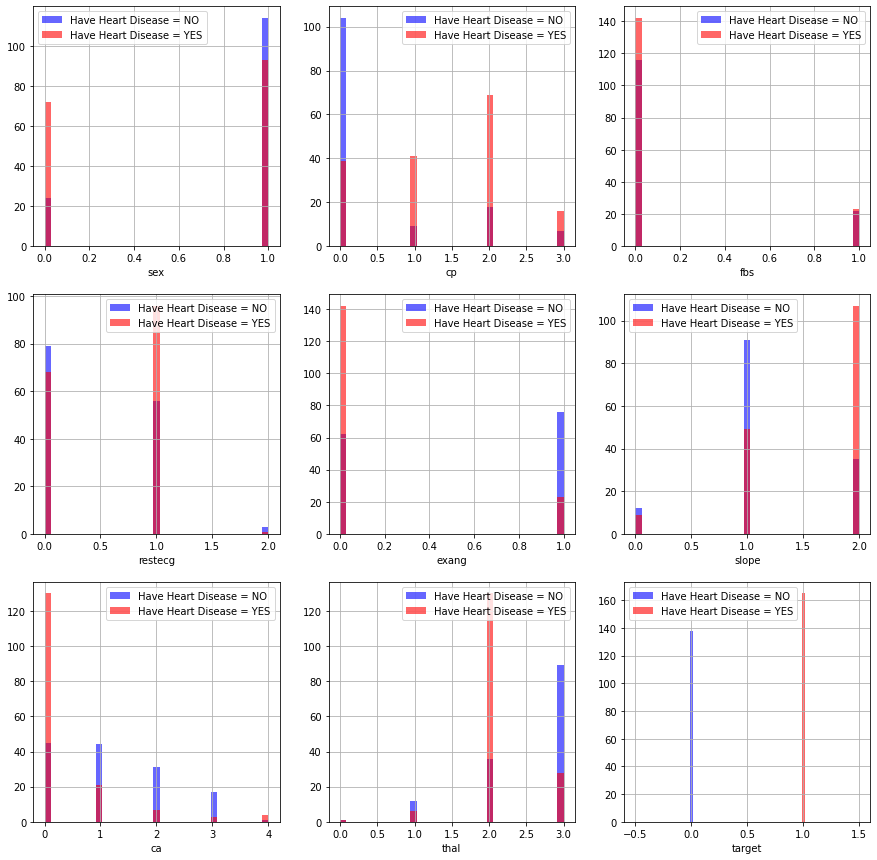

In [51]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    dataFrame[dataFrame["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    dataFrame[dataFrame["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

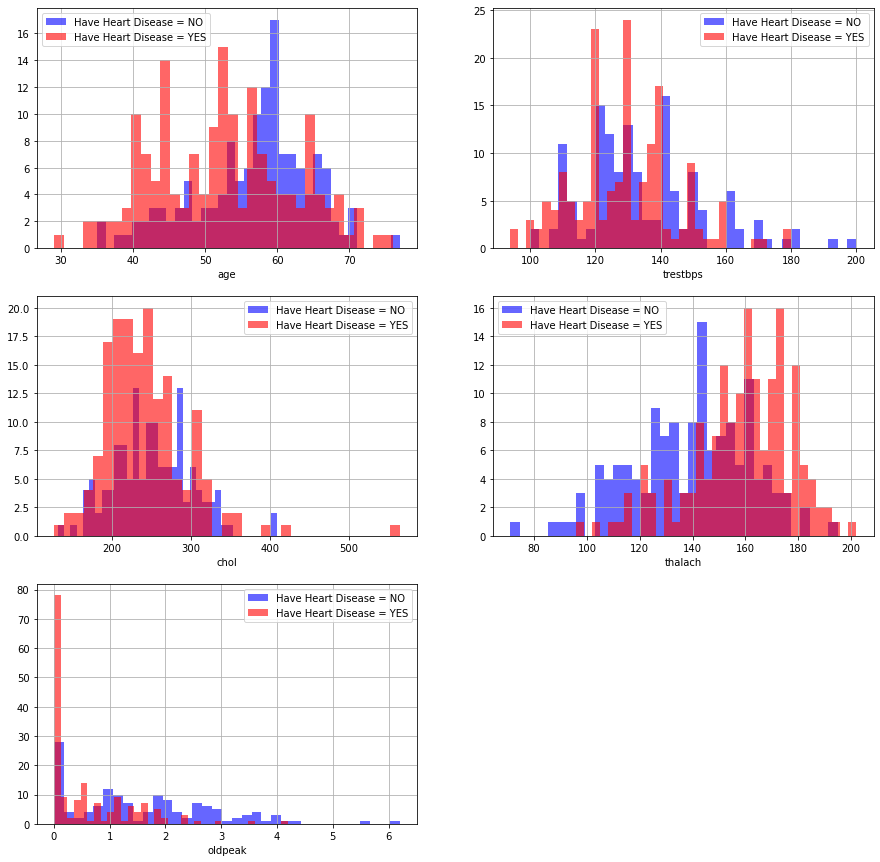

In [52]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continuous_val, 1):
    plt.subplot(3, 2, i)
    dataFrame[dataFrame["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    dataFrame[dataFrame["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

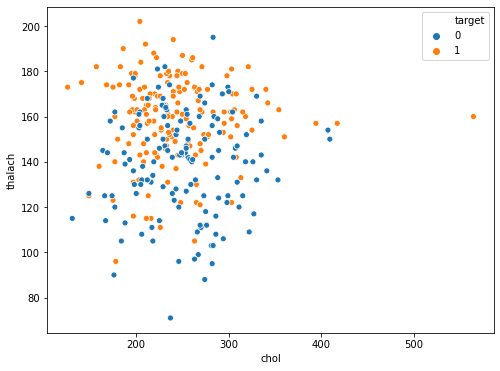

In [53]:
plt.figure(figsize=(8,6))
sbn.scatterplot(x='chol',y='thalach',data=dataFrame,hue='target')
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [65]:
#Alloting target as 'y'
y = dataFrame.target.values
x_data = dataFrame.drop(['target'], axis = 1)
#Normalize the data
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

#Finding the shape of 'x'
x.shape

(303, 13)

In [67]:


#We will split our data. 80% of our data will be train data and 20% of it will be test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)



In [68]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

#Using decision tree algorithm for prediction
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 77.05%


In [69]:
import tensorflow as tf

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [71]:
model = Sequential()

model.add(Dense(4,activation ="relu"))
model.add(Dense(4,activation ="relu"))
model.add(Dense(4,activation ="relu"))

model.add(Dense(1))

model.compile(optimizer = "rmsprop", loss = "mse")

In [95]:
x_train = x_train.T
y_train=y_train.T

x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,0.291667,0.0,0.666667,0.264151,0.198630,0.0,0.5,0.717557,0.0,0.032258,0.5,0.00,0.666667
153,0.770833,0.0,0.666667,0.490566,0.347032,0.0,0.0,0.618321,0.0,0.000000,0.5,0.25,0.666667
64,0.604167,1.0,0.666667,0.433962,0.194064,1.0,0.0,0.717557,0.0,0.000000,1.0,0.00,0.666667
296,0.708333,0.0,0.000000,0.283019,0.162100,0.0,0.5,0.496183,1.0,0.000000,0.5,0.00,0.666667
287,0.583333,1.0,0.333333,0.566038,0.242009,0.0,0.0,0.709924,0.0,0.000000,1.0,0.25,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.291667,1.0,0.000000,0.358491,0.276256,1.0,0.0,0.549618,1.0,0.016129,0.5,1.00,1.000000
192,0.520833,1.0,0.000000,0.245283,0.141553,0.0,0.5,0.320611,0.0,0.225806,0.5,0.25,1.000000
117,0.562500,1.0,1.000000,0.245283,0.152968,0.0,0.0,0.694656,0.0,0.306452,0.5,0.00,1.000000
47,0.375000,1.0,0.666667,0.415094,0.299087,0.0,0.0,0.648855,0.0,0.000000,1.0,0.00,0.666667


In [96]:
model.fit(x_train,y_train,epochs=200)

Epoch 1/200
8/8 [==============================] - 0s 627us/step - loss: 0.1080
Epoch 2/200
8/8 [==============================] - 0s 748us/step - loss: 0.1078
Epoch 3/200
8/8 [==============================] - 0s 749us/step - loss: 0.1086
Epoch 4/200
8/8 [==============================] - 0s 748us/step - loss: 0.1081
Epoch 5/200
8/8 [==============================] - 0s 499us/step - loss: 0.1086
Epoch 6/200
8/8 [==============================] - 0s 873us/step - loss: 0.1091
Epoch 7/200
8/8 [==============================] - 0s 499us/step - loss: 0.1081
Epoch 8/200
8/8 [==============================] - 0s 872us/step - loss: 0.1080
Epoch 9/200
8/8 [==============================] - 0s 749us/step - loss: 0.1080
Epoch 10/200
8/8 [==============================] - 0s 746us/step - loss: 0.1088
Epoch 11/200
8/8 [==============================] - 0s 1ms/step - loss: 0.1076
Epoch 12/200
8/8 [==============================] - 0s 627us/step - loss: 0.1077
Epoch 13/200
8/8 [=====================

8/8 [==============================] - 0s 499us/step - loss: 0.1040
Epoch 103/200
8/8 [==============================] - 0s 748us/step - loss: 0.1036
Epoch 104/200
8/8 [==============================] - 0s 499us/step - loss: 0.1043
Epoch 105/200
8/8 [==============================] - 0s 748us/step - loss: 0.1037
Epoch 106/200
8/8 [==============================] - 0s 623us/step - loss: 0.1030
Epoch 107/200
8/8 [==============================] - 0s 499us/step - loss: 0.1031
Epoch 108/200
8/8 [==============================] - 0s 623us/step - loss: 0.1041
Epoch 109/200
8/8 [==============================] - 0s 499us/step - loss: 0.1030
Epoch 110/200
8/8 [==============================] - 0s 623us/step - loss: 0.1020
Epoch 111/200
8/8 [==============================] - 0s 499us/step - loss: 0.1029
Epoch 112/200
8/8 [==============================] - 0s 873us/step - loss: 0.1050
Epoch 113/200
8/8 [==============================] - 0s 499us/step - loss: 0.1029
Epoch 114/200
8/8 [===========

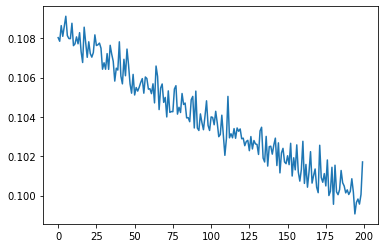

In [97]:
loss = model.history.history["loss"]
sbn.lineplot(x=range(len(loss)),y=loss)

In [113]:
x_test = x_test.T
y_test=y_test.T

In [114]:
trainLoss=model.evaluate(x_train,y_train, verbose=0)

In [115]:
testLoss=model.evaluate(x_test,y_test,verbose=0)

In [116]:
testLoss

0.09920274466276169

In [117]:
trainLoss

0.09920274466276169

In [118]:
testTahmnileri = model.predict(x_test)

In [122]:
testTahmnileri.shape

(242, 1)

In [120]:
tahminDf = pd.DataFrame(y_test,columns=["Gerçek Y"])

In [121]:
tahminDf

,Gerçek Y
0,1
1,1
2,1
3,0
4,0
...,...
237,0
238,0
239,1
240,1


In [123]:
testTahmnileri = pd.Series(testTahmnileri.reshape(242,))

In [124]:
testTahmnileri

0      1.169338
1      0.872488
2      0.935305
3      0.479880
4      0.559721
         ...   
237    0.007591
238    0.112460
239    0.789149
240    0.771922
241    0.736756
Length: 242, dtype: float32

In [125]:
tahminDf = pd.concat([tahminDf,testTahmnileri], axis=1)

In [127]:
tahminDf.columns = ["Gerçek Y", "Tahmin Y"]

In [128]:
tahminDf

,Gerçek Y,Tahmin Y
0,1,1.169338
1,1,0.872488
2,1,0.935305
3,0,0.479880
4,0,0.559721
...,...,...
237,0,0.007591
238,0,0.112460
239,1,0.789149
240,1,0.771922


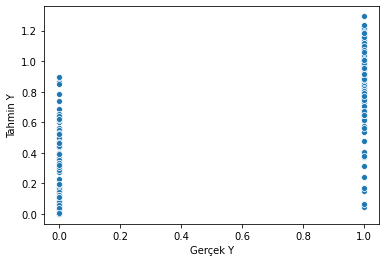

In [137]:
sbn.scatterplot(x= "Gerçek Y", y = "Tahmin Y", data = tahminDf)

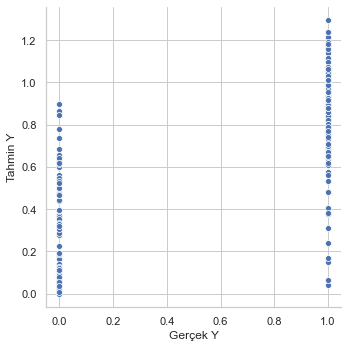

In [148]:
sbn.set_style(style="whitegrid")

sbn.relplot(x="Gerçek Y", y="Tahmin Y", data=tahminDf)

In [149]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [151]:
mean_absolute_error(tahminDf["Gerçek Y"], tahminDf["Tahmin Y"])

0.22547125734758278

In [166]:
dataFrame.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [170]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [171]:
yeniBirInsan=[[41,0,1,130,204,0,0,172,0,1.4,2,0,2]]

In [173]:
yeniBirInsan = scaler.fit_transform(yeniBirInsan)

In [174]:
model.predict(yeniBirInsan)

array([[0.76747894]], dtype=float32)

In [179]:
from tensorflow.keras.models import load_model

In [185]:
model.save("Heart.h5")